In [1]:
import torch
import numpy as np
from torch.autograd import Variable
import matplotlib.pylab as plt

In [2]:
import sys
sys.path.insert(0,'vp_class/')

**Import class**

In [3]:
from class_ou import OU, ou_gradient
from class_vp_tou import tOU, tOU_Score

**Finding MLE estimator for time-homogeneous Ornstein-Uhlenbeck process**

1. Simulate two sample path from OU process

In [4]:
D = 2
alpha = torch.tensor(0).repeat(D, 1)
beta = torch.tensor([1.,2.]).reshape(-1,1)
z0 = 10
sigma = torch.tensor(1.).repeat(D,1)

**Note that the diffusion simulation based on Euler-Maruyama results in very smooth plot once dt > 2.**

In [5]:
true_ou = OU(t0 = 0., t1 = 10., z0 = z0, alpha = alpha, beta = beta, sigma = sigma, dN=1000, timegrid='False')

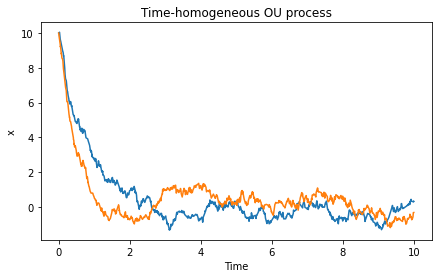

In [6]:
plt.figure(figsize=(7, 4))
plt.xlabel("Time")
plt.ylabel("x")
plt.title("Time-homogeneous OU process")
plt.plot(true_ou.pts.T, true_ou.trj.T)
plt.show()

2. Implement gradient descent algorithm to find the MLE

In [15]:
alpha_ = torch.randn((2, 1))
beta_ = torch.tensor([5., 5.]).reshape(-1,1)


learning_rate = 0.005

for i in range(1000):
    params = torch.stack([alpha_, beta_, sigma])
    
    lr = 0.05
    update = ou_gradient(true_ou.pts, true_ou.trj, params)
    alpha_ += learning_rate * update['alpha']
    beta__ =  beta_ + learning_rate * update['beta']
    
    
    while any(beta__ < 0):
        for d in range(beta_.shape[0]):
            if beta__[d] < 0:
                while beta__[d] < 0:
                    beta__[d] = beta_[d] + lr * update['beta'][d]
                    lr *= 0.5
    beta_ = beta__

    if i % 500 == 0:
        print('alpha = ', alpha_.data.numpy(), "beta = ", beta_.data.numpy(),  'LL = ', update['LL'])

alpha =  [[0.07958806]
 [0.37322372]] beta =  [[4.1909804]
 [4.6183705]] LL =  tensor([ 873.4690, 1043.4164])
alpha =  [[-0.2487451]
 [ 0.0191367]] beta =  [[1.3412102]
 [2.0373824]] LL =  tensor([1206.3369, 1155.6454])


**Comparision: observations vs sample (from OU with MLE)**

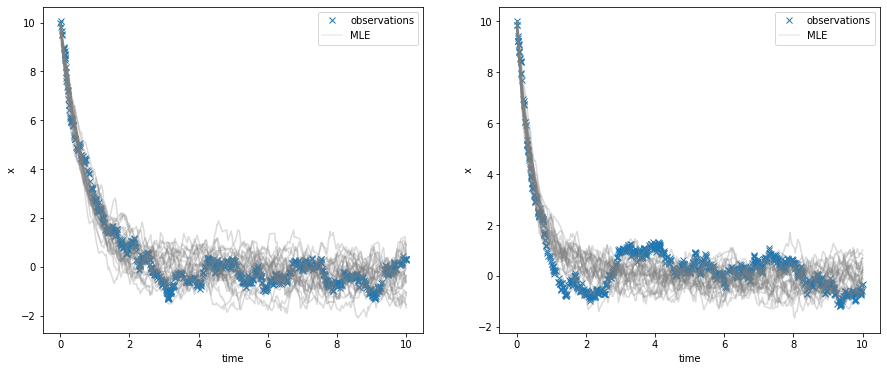

In [20]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15,6))
# plt.title("Fitted Process: MLE")
for j, ax in enumerate(ax.ravel()):
    ax.plot(true_ou.pts[j], true_ou.trj[j], 'x', label='observations')
    for i in range(25):
        vi = OU(t0 = 0., t1 = 10., z0 = z0, alpha = alpha_, beta = beta_, sigma = sigma, dN=300, timegrid='True')    
        ax.plot(vi.pts[j], vi.trj[j], alpha=0.15, color='grey')
        ax.plot(vi.pts[j], vi.trj[j], alpha=0.15, color='grey')
        if i == 24:
            ax.plot(vi.pts[j], vi.trj[j], alpha=0.15, color='grey', label='MLE')
    ax.set_xlabel("time")
    ax.set_ylabel("x")
    ax.legend()
plt.show()

In [21]:
print("True alpha = \n", alpha.data.numpy(), "\nAlpha_MLE = \n", alpha_.data.numpy(), "\nTrue Beta = \n", beta.data.numpy(), "\nBeta_MLE = \n", beta_.data.numpy())

True alpha = 
 [[0]
 [0]] 
Alpha_MLE = 
 [[-0.2487451]
 [ 0.0191367]] 
True Beta = 
 [[1.]
 [2.]] 
Beta_MLE = 
 [[1.3412102]
 [2.0373824]]
